In [102]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
from fredapi import Fred
from matplotlib import pyplot as plt

# Step 3, 4

* *Identify, import, structure, and graph macroeconomic, microeconomic, and geopolitical variables that affect the price of oil globally.*

* *As a group, the team writes a dictionary of the data used and a table showing the data,
frequency, source, start date, end date, and other relevant fields.*

### Oil Prices

We are going to use the Crude Oil monthly futures data as our oil price proxy (yahoo finance ticker **"CL=F"**). This futures price data is extrapolated into the past such that we can use it as a historical proxy as well.

In [103]:
ticker_oil = "CL=F"
end_date = dt.date(2025, 9, 27)
start_date = dt.date(2001, 9, 1)
df_oil_price = yf.download(tickers=ticker_oil, start=start_date, end=end_date).droplevel(level=1, axis=1)
df_oil_price.loc[:, "Return"] = df_oil_price.loc[:, "Close"].pct_change()
df_oil_price = df_oil_price.loc[:, ["Close", "Return"]].dropna()
df_oil_price.columns.name = None
df_oil_price.columns = ["Value", "Return"]

print("-- Oil Prices Data Dictionary: --")
print("Frequency: Daily")
print("Source: Yahoo Finance")
print("Start Date:", start_date)
print("End Date:", end_date)
print("-"*40)
print(df_oil_price.info())
print("-"*40)
print(df_oil_price.describe())
df_oil_price

C:\Users\Atakan\AppData\Local\Temp\ipykernel_19572\3508167175.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_oil_price = yf.download(tickers=ticker_oil, start=start_date, end=end_date).droplevel(level=1, axis=1)
[*********************100%***********************]  1 of 1 completed

-- Oil Prices Data Dictionary: --
Frequency: Daily
Source: Yahoo Finance
Start Date: 2001-09-01
End Date: 2025-09-27
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6042 entries, 2001-09-05 to 2025-09-26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   6042 non-null   float64
 1   Return  6042 non-null   float64
dtypes: float64(2)
memory usage: 141.6 KB
None
----------------------------------------
             Value       Return
count  6042.000000  6042.000000
mean     66.231336    -0.000132
std      24.098848     0.049923
min     -37.630001    -3.059661
25%      48.417500    -0.012580
50%      65.814999     0.001043
75%      83.080002     0.013504
max     145.289993     0.376623


,Value,Return
Date,,
2001-09-05,26.950001,0.000743
2001-09-06,27.580000,0.023377
2001-09-07,28.030001,0.016316
2001-09-10,27.629999,-0.014270
2001-09-14,29.530001,0.068766
...,...,...
2025-09-22,62.639999,-0.000638
2025-09-23,63.410000,0.012292
2025-09-24,64.989998,0.024917


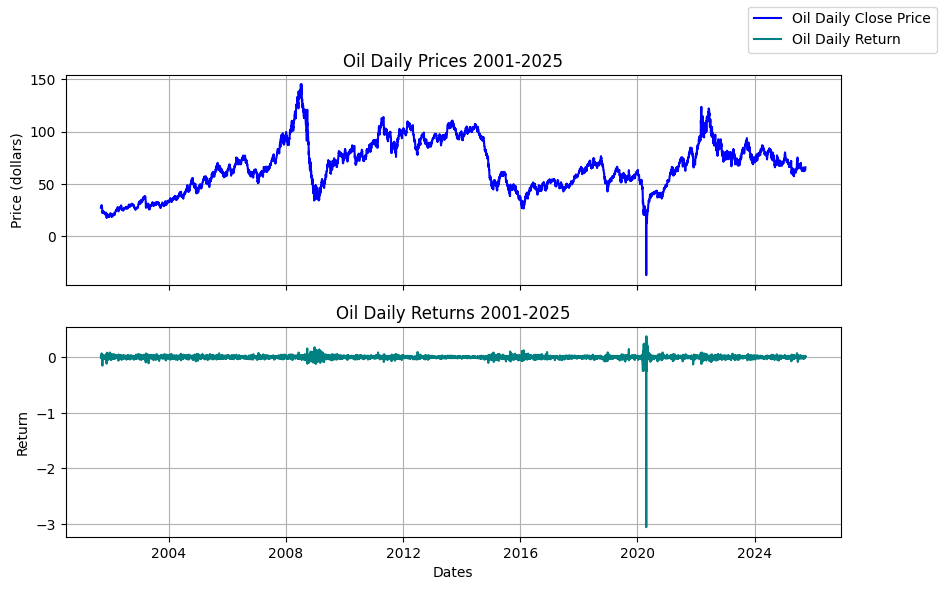

In [104]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
axs[0].plot(df_oil_price.loc[:, "Value"], label="Oil Daily Close Price", color="b")
axs[0].set_title("Oil Daily Prices 2001-2025")
axs[0].grid()
axs[0].set_ylabel("Price (dollars)")
axs[1].plot(df_oil_price.loc[:, "Return"], label="Oil Daily Return", color="teal")
axs[1].set_title("Oil Daily Returns 2001-2025")
axs[1].grid()
axs[1].set_ylabel("Return")
axs[1].set_xlabel("Dates")
fig.legend()

## Macroeconomic Data



### US Gross Domestic Product

We are going to use the US GDP for the macroeconomic dataset.

In [105]:
fred = Fred(api_key="0bebdda5c26c5b61d660182fe22a55c9")
df_gdp = fred.get_series("GDP").loc[start_date:end_date]
print("-- US GDP Data Dictionary: --")
print("Frequency: Quarterly")
print("Source: FRED")
print("Start Date:", start_date)
print("End Date:", end_date)
print("-"*40)
print(df_gdp.info())
print("-"*40)
print(df_gdp.describe())
df_gdp

-- US GDP Data Dictionary: --
Frequency: Quarterly
Source: FRED
Start Date: 2001-09-01
End Date: 2025-09-27
----------------------------------------
<class 'pandas.core.series.Series'>
DatetimeIndex: 95 entries, 2001-10-01 to 2025-04-01
Series name: None
Non-Null Count  Dtype  
--------------  -----  
95 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB
None
----------------------------------------
count       95.000000
mean     18170.183705
std       5336.430599
min      10660.465000
25%      14416.492000
50%      16953.838000
75%      21254.769000
max      30485.729000
dtype: float64


2001-10-01    10660.465
2002-01-01    10783.500
2002-04-01    10887.460
2002-07-01    10984.040
2002-10-01    11061.433
                ...    
2024-04-01    29147.044
2024-07-01    29511.664
2024-10-01    29825.182
2025-01-01    30042.113
2025-04-01    30485.729
Length: 95, dtype: float64

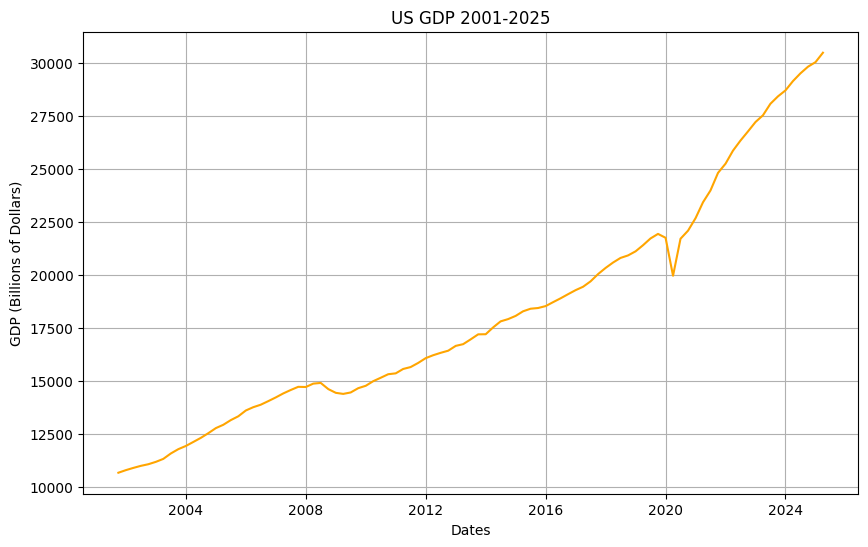

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(df_gdp, label="US GDP", color="orange")
plt.ylabel("GDP (Billions of Dollars)")
plt.xlabel("Dates")
plt.title("US GDP 2001-2025")
plt.grid()

## Microeconomic Data

### US Producer Price Index by Industry: Total Manufacturing Industries

We are going to use the US Manufacturing PPI as our microeconomic proxy dataset, as its activities are highly relevant for the oil market.

In [107]:
df_ppi = fred.get_series("PCUOMFGOMFG").loc[start_date:end_date]
print("-- US Manufacturing PPI Data Dictionary: --")
print("Frequency: Monthly")
print("Source: FRED")
print("Start Date:", start_date)
print("End Date:", end_date)
print("-"*40)
print(df_ppi.info())
print("-"*40)
print(df_ppi.describe())
df_ppi

-- US Manufacturing PPI Data Dictionary: --
Frequency: Monthly
Source: FRED
Start Date: 2001-09-01
End Date: 2025-09-27
----------------------------------------
<class 'pandas.core.series.Series'>
DatetimeIndex: 288 entries, 2001-09-01 to 2025-08-01
Series name: None
Non-Null Count  Dtype  
--------------  -----  
288 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB
None
----------------------------------------
count    288.000000
mean     187.076451
std       33.809694
min      131.600000
25%      163.775000
50%      187.900000
75%      197.050000
max      262.418000
dtype: float64


2001-09-01    135.600
2001-10-01    133.700
2001-11-01    132.700
2001-12-01    131.600
2002-01-01    131.700
               ...   
2025-04-01    250.465
2025-05-01    251.339
2025-06-01    252.017
2025-07-01    253.663
2025-08-01    253.792
Length: 288, dtype: float64

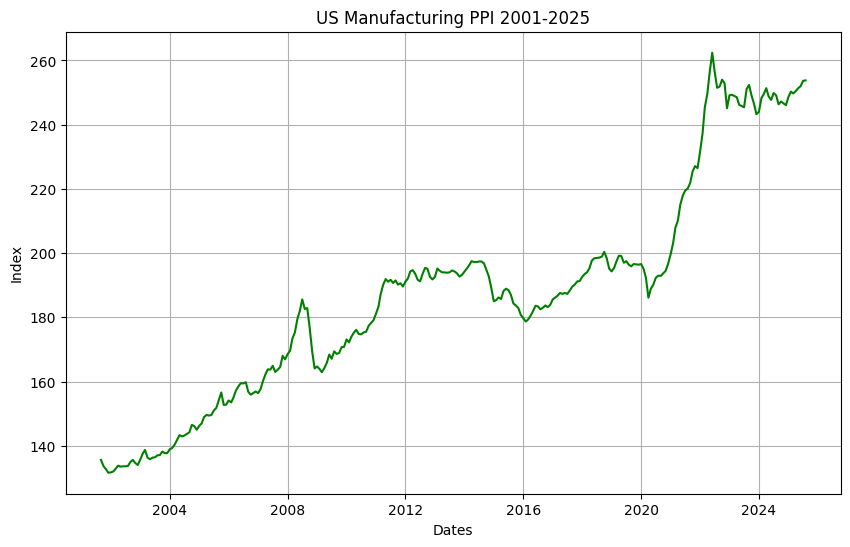

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(df_ppi, color="green")
plt.ylabel("Index")
plt.xlabel("Dates")
plt.title("US Manufacturing PPI 2001-2025")
plt.grid()

______________________

# Step 5

* *Clean the data.*